## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr

## Load data

In [2]:
data = xr.open_dataset('../data/air_quality/delhi_cpcb_2022.nc')
df = data.to_dataframe().reset_index()
df.head(2)

,station,time,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,"Alipur, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01 00:00:00,2022-01-01 01:00:00,219.5,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.6,999.1,6.85,0.0,0.0,28.815329,77.15301
1,"Alipur, Delhi - DPCC",2022-01-01 01:30:00,2022-01-01 01:00:00,2022-01-01 02:00:00,224.5,360.25,89.30,44.70,96.60,5.50,...,82.23,NaN,206.05,4.6,998.9,6.72,0.0,0.0,28.815329,77.15301


In [3]:
df.columns

Index(['station', 'time', 'From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF', 'latitude', 'longitude'],
      dtype='object')

## Analyze missing values

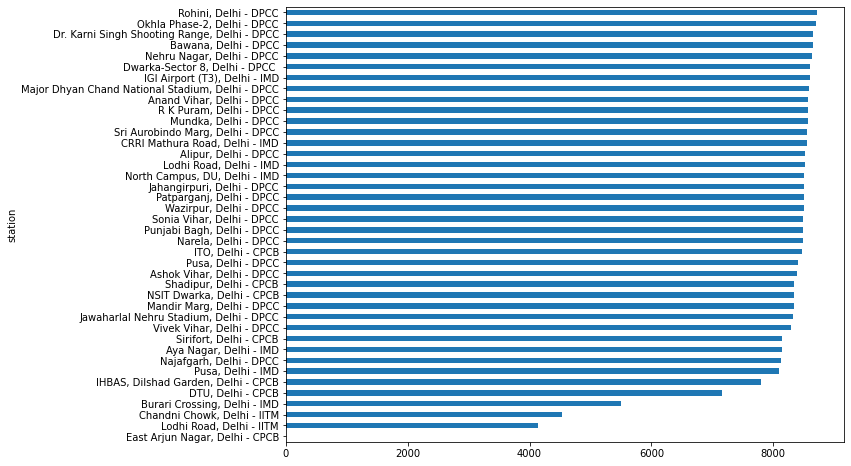

In [4]:
# plot amount of missing data per station sorted
count_df = df.groupby('station')['PM2.5'].count().sort_values()
count_df.plot.barh(figsize=(10, 8));

## Remove station with all missing values

In [5]:
# remove "East Arjun Nagar, Delhi - CPCB" station from xarray dataset
clean_data = data.drop_sel(station='East Arjun Nagar, Delhi - CPCB')

# save cleaned dataset
clean_data.to_netcdf('processed_data/delhi_cpcb_2022_cleaned.nc')